In [ ]:
!nvidia-smi

Mon Nov 15 09:43:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.preprocessing import shuffle_arrays_unison
from mlxtend.plotting import plot_learning_curves
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from scipy import interp
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install rasterio
import rasterio as rio

     |████████████████████████████████| 19.3 MB 13.6 MB/s 


In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
data_dir = "/mydrive/Colab Notebooks/colab"

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(f'{data_dir}/AOI.csv')
df

,Unnamed: 0,Areas_of_Interest,Log_Distance_to_Archaean_Contact,Log_Distance_to_Faults,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,SA_GRAV,SA_GRAV_1VD,SA_RESIDUAL,SA_TMI_RTP,Zones
0,221131,0.0,9.317426,10.639133,1.747967,1.282043,-2.268688,2.323293,2.706226,-9.741625,0.003272,2.279978,111.083755,2.0
1,275260,0.0,9.546973,10.615351,2.673912,1.708956,-2.787659,2.306746,2.698171,-8.473590,0.002389,1.719324,-53.269314,2.0
2,323985,0.0,9.224206,10.580169,1.656459,-0.221074,-2.685827,2.289121,2.708424,-3.992554,0.004786,3.351179,-168.483520,2.0
3,442865,1.0,8.378877,8.515255,2.262401,-0.748839,-2.695365,1.763430,2.098865,-4.909769,0.005727,3.855369,445.482700,2.0
4,540253,0.0,8.799414,8.799414,1.526737,-0.781344,-2.663550,1.601960,1.987154,-5.280754,0.004098,2.991362,516.428470,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,6366444,1.0,4.839822,8.376886,3.822357,1.922945,-3.385979,3.885334,3.519293,-14.638707,0.000439,0.159652,-8.922378,24.0
741,6369150,1.0,5.114939,8.431977,3.833668,2.032393,-3.212128,3.879424,3.516555,-14.760900,0.000557,0.193758,-62.946705,24.0
742,6372023,0.0,7.245485,7.751619,4.259253,2.310755,-1.824680,3.048379,2.056857,-15.353344,0.002957,0.613988,198.818630,24.0
743,6372242,0.0,5.711173,5.711173,3.711189,2.474739,-5.217255,2.938949,3.105232,-8.322723,0.001366,1.046216,164.810230,25.0


In [ ]:
df = df.sort_values('Zones')
df

,Unnamed: 0,Areas_of_Interest,Log_Distance_to_Archaean_Contact,Log_Distance_to_Faults,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,SA_GRAV,SA_GRAV_1VD,SA_RESIDUAL,SA_TMI_RTP,Zones
0,221131,0.0,9.317426,10.639133,1.747967,1.282043,-2.268688,2.323293,2.706226,-9.741625,0.003272,2.279978,111.083755,2.0
1,275260,0.0,9.546973,10.615351,2.673912,1.708956,-2.787659,2.306746,2.698171,-8.473590,0.002389,1.719324,-53.269314,2.0
2,323985,0.0,9.224206,10.580169,1.656459,-0.221074,-2.685827,2.289121,2.708424,-3.992554,0.004786,3.351179,-168.483520,2.0
3,442865,1.0,8.378877,8.515255,2.262401,-0.748839,-2.695365,1.763430,2.098865,-4.909769,0.005727,3.855369,445.482700,2.0
4,540253,0.0,8.799414,8.799414,1.526737,-0.781344,-2.663550,1.601960,1.987154,-5.280754,0.004098,2.991362,516.428470,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,6301907,0.0,4.794821,7.949560,1.985071,0.186991,-2.246075,2.871247,3.173510,-14.571733,-0.001474,-0.835423,377.081480,25.0
736,6301994,0.0,7.059896,7.059896,2.333378,1.555925,-2.216252,2.646135,3.357282,-9.199225,0.001058,0.860368,-126.783110,25.0
714,5801215,0.0,10.107053,9.950755,1.839199,0.308863,-3.783532,3.041553,2.727454,-12.821439,0.000258,0.372248,-57.433186,25.0
712,5798541,0.0,10.057702,10.208198,2.246461,-0.154233,-4.058258,2.862626,2.428889,-14.963561,0.000112,0.069255,-32.068565,25.0


In [ ]:
X = df.drop(['Unnamed: 0', 'Areas_of_Interest', 'Zones', 'SA_RESIDUAL'], axis=1)
Y = df['Areas_of_Interest']
Z = df['Zones']

In [ ]:
Y

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
735    0.0
736    0.0
714    0.0
712    0.0
743    0.0
Name: Areas_of_Interest, Length: 745, dtype: float64

In [ ]:
X

,Log_Distance_to_Archaean_Contact,Log_Distance_to_Faults,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,SA_GRAV,SA_GRAV_1VD,SA_TMI_RTP
0,9.317426,10.639133,1.747967,1.282043,-2.268688,2.323293,2.706226,-9.741625,0.003272,111.083755
1,9.546973,10.615351,2.673912,1.708956,-2.787659,2.306746,2.698171,-8.473590,0.002389,-53.269314
2,9.224206,10.580169,1.656459,-0.221074,-2.685827,2.289121,2.708424,-3.992554,0.004786,-168.483520
3,8.378877,8.515255,2.262401,-0.748839,-2.695365,1.763430,2.098865,-4.909769,0.005727,445.482700
4,8.799414,8.799414,1.526737,-0.781344,-2.663550,1.601960,1.987154,-5.280754,0.004098,516.428470
...,...,...,...,...,...,...,...,...,...,...
735,4.794821,7.949560,1.985071,0.186991,-2.246075,2.871247,3.173510,-14.571733,-0.001474,377.081480
736,7.059896,7.059896,2.333378,1.555925,-2.216252,2.646135,3.357282,-9.199225,0.001058,-126.783110
714,10.107053,9.950755,1.839199,0.308863,-3.783532,3.041553,2.727454,-12.821439,0.000258,-57.433186
712,10.057702,10.208198,2.246461,-0.154233,-4.058258,2.862626,2.428889,-14.963561,0.000112,-32.068565


In [ ]:
for i, (train, test) in enumerate(gss.split(X, Y, Z)):
        print('CV '+str(i+1)+': number of training data is '+str(len(train))+' and test is '+str(len(test)))

CV 1: number of training data is 687 and test is 58
CV 2: number of training data is 535 and test is 210
CV 3: number of training data is 445 and test is 300
CV 4: number of training data is 640 and test is 105
CV 5: number of training data is 638 and test is 107
CV 6: number of training data is 558 and test is 187
CV 7: number of training data is 442 and test is 303
CV 8: number of training data is 442 and test is 303
CV 9: number of training data is 686 and test is 59
CV 10: number of training data is 630 and test is 115
CV 11: number of training data is 577 and test is 168
CV 12: number of training data is 642 and test is 103
CV 13: number of training data is 607 and test is 138
CV 14: number of training data is 497 and test is 248
CV 15: number of training data is 500 and test is 245
CV 16: number of training data is 606 and test is 139
CV 17: number of training data is 578 and test is 167
CV 18: number of training data is 481 and test is 264
CV 19: number of training data is 677 a

In [ ]:
#Formatting plot
plt.rcParams.update({'font.size': 14})

#prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('XGBOOST', XGBClassifier()))

# valuate each model in turn
print("MODEL: F1 Score (STD)")

results_ba = []
results_recall = []
results_f1 = []
names = []

for name, model in models:
    cv_results_ba = model_selection.cross_val_score(model, X, Y, cv=gss, scoring='balanced_accuracy', groups=Z)
    cv_results_f1 = model_selection.cross_val_score(model, X, Y, cv=gss, scoring='f1', groups=Z)
    cv_results_recall = model_selection.cross_val_score(model, X, Y, cv=gss, scoring='recall', groups=Z)
    results_ba.append(cv_results_ba)
    results_recall.append(cv_results_recall)
    results_f1.append(cv_results_f1)
    names.append(name)
    msg = "%s: BA %f (%f), F1 %f (%f), Recall %f (%f)" % (name, cv_results_ba.mean(), cv_results_ba.std(),  cv_results_f1.mean(), cv_results_f1.std(),  cv_results_recall.mean(), cv_results_recall.std())
    print(msg)

MODEL: F1 Score (STD)
LR: BA 0.451927 (0.098936), F1 0.141940 (0.147690), Recall 0.145117 (0.159063)
LDA: BA 0.491398 (0.103922), F1 0.238969 (0.193338), Recall 0.238845 (0.208901)
KNN: BA 0.497868 (0.064777), F1 0.167485 (0.113031), Recall 0.158182 (0.127778)
SVM: BA 0.526774 (0.099764), F1 0.080327 (0.133667), Recall 0.059862 (0.105019)
NB: BA 0.520844 (0.105486), F1 0.275244 (0.221892), Recall 0.293903 (0.264947)
RF: BA 0.579444 (0.124089), F1 0.235603 (0.261336), Recall 0.181611 (0.223334)
LGBM: BA 0.564860 (0.119045), F1 0.251017 (0.237034), Recall 0.204963 (0.213911)
XGBOOST: BA 0.569822 (0.121036), F1 0.275339 (0.257130), Recall 0.239333 (0.235747)


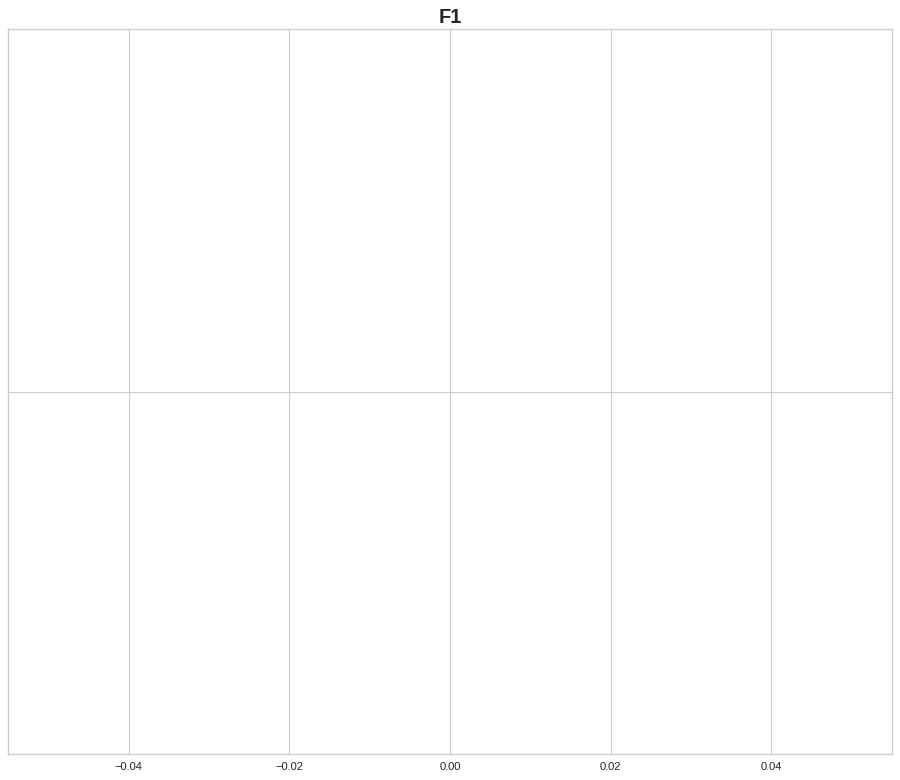

In [ ]:
# acc = [[results_ba], [results_recall], [results_f1]]
from matplotlib.pyplot import figure

figure(figsize=(17, 12), dpi=80)
df = pd.DataFrame(results_recall, index=names)
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('F1', fontsize=18, fontweight='bold')
plt.show()

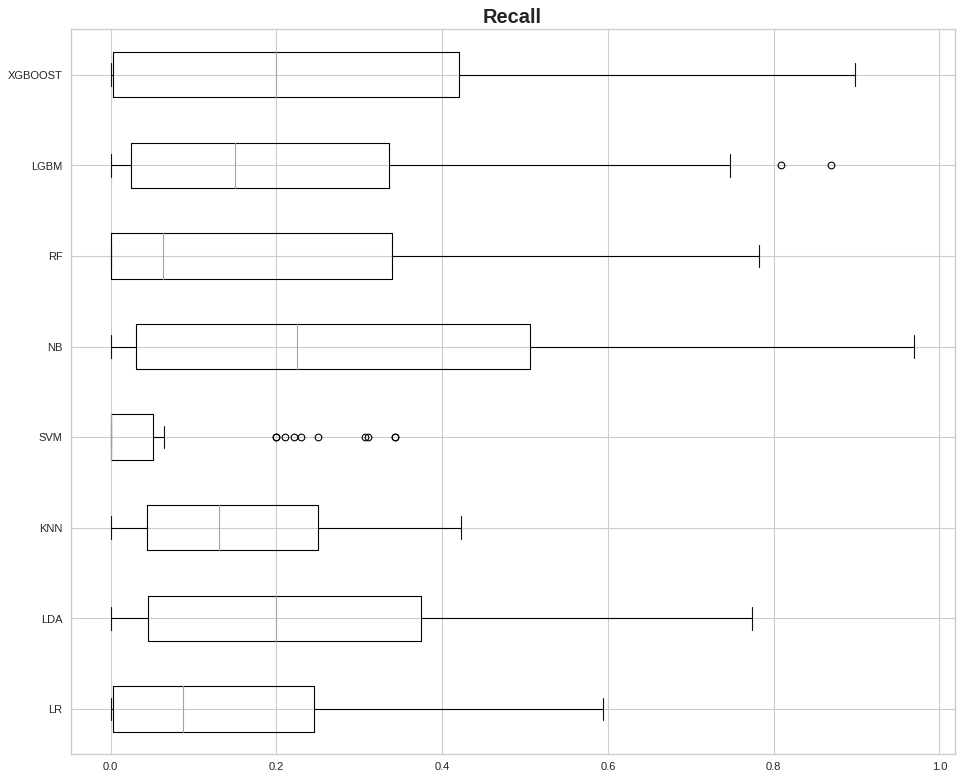

In [ ]:
# acc = [[results_ba], [results_recall], [results_f1]]
from matplotlib.pyplot import figure

figure(figsize=(17, 12), dpi=80)
df = pd.DataFrame(results_recall, index=names)
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('Recall', fontsize=18, fontweight='bold')
plt.show()

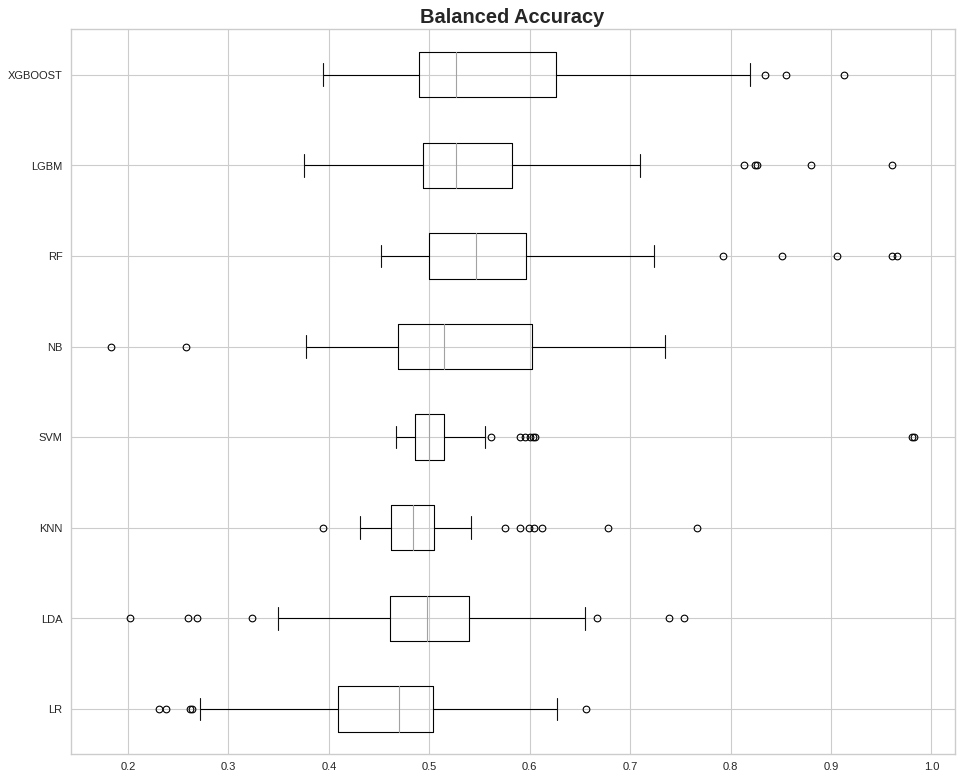

In [ ]:
# acc = [[results_ba], [results_recall], [results_f1]]
from matplotlib.pyplot import figure

figure(figsize=(17, 12), dpi=80)
df = pd.DataFrame(results_ba, index=names)
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('Balanced Accuracy', fontsize=18, fontweight='bold')
plt.show()

In [ ]:
type(Y.values.tolist())

list

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
results = []
from sklearn.metrics import matthews_corrcoef
# #prepare models
names = ['LR', 'LDA', 'KNN', 'SVM', 'NB', 'RF', 'LGBM', 'XGBOOST']

clf = LogisticRegression().fit(X, Y)
results.append(matthews_corrcoef(Y, clf.decision_function(X)))

clf = LinearDiscriminantAnalysis().fit(X, Y)
results.append(matthews_corrcoef(Y, clf.decision_function(X)))

clf = KNeighborsClassifier().fit(X, Y)
results.append(matthews_corrcoef(Y, clf.predict(X)))

clf = SVC().fit(X, Y)
results.append(matthews_corrcoef(Y, clf.decision_function(X)))

clf = GaussianNB().fit(X, Y)
results.append(matthews_corrcoef(Y, clf.predict(X)))

clf = RandomForestClassifier().fit(X, Y)
results.append(matthews_corrcoef(Y, clf.predict(X)))

clf = LGBMClassifier().fit(X, Y)
results.append(matthews_corrcoef(Y, clf.predict(X)))

clf = XGBClassifier().fit(X, Y)
results.append(matthews_corrcoef(Y, clf.predict(X)))

print(results)


ValueError: ignored

In [ ]:
df = pd.DataFrame({'Models': ['A', 'B', 'C'], 'val': [10, 30, 20]})
df

,lab,val
0,A,10
1,B,30
2,C,20


In [ ]:
names = ['LR', 'LDA', 'KNN', 'SVM', 'NB', 'RF', 'LGBM', 'XGBOOST']
df = pd.DataFrame(results, index=names)
ax = df.plot.barh(x='lab', y='val')

KeyError: ignored

In [ ]:
(X_train,X_test,y_train,y_test) = train_test_split(X,Y,test_size=0.1,random_state=0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=0)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

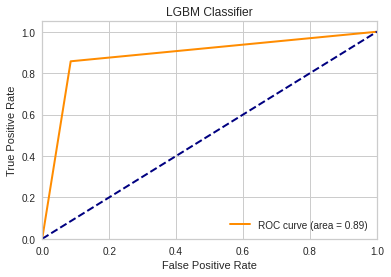

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

(X_train,X_test,y_train,y_test) = train_test_split(X,Y,test_size=0.1,random_state=0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    LGBMClassifier(), 
)
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LGBM Classifier")
plt.legend(loc="lower right")
plt.savefig('/mydrive/Colab Notebooks/8.png')


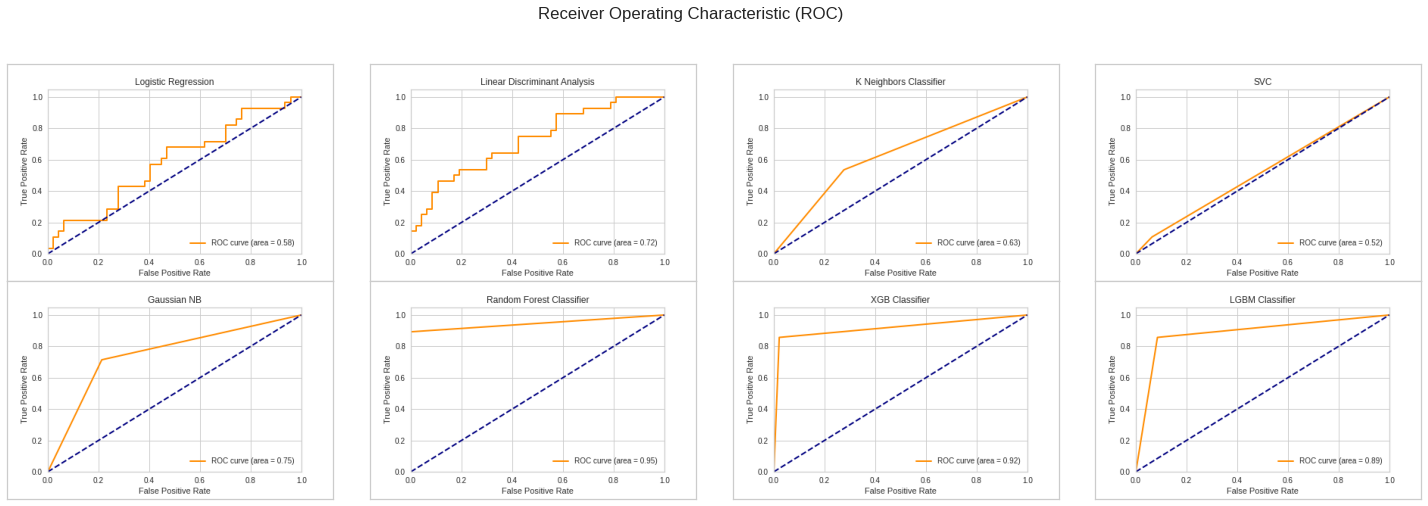

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

w = 10
h = 10
fig = plt.figure(figsize=(26, 8))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(f'/mydrive/Colab Notebooks/{i}.png')
    ax = fig.add_subplot(rows, columns, i)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.suptitle("Receiver Operating Characteristic (ROC)")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('/mydrive/Colab Notebooks/comb.png')

In [ ]:
# F
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC()))
# models.append(('NB', GaussianNB()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('LGBM', LGBMClassifier()))
# models.append(('XGBOOST', XGBClassifier()))
clf = LogisticRegression().fit(X, Y.values.tolist())
roc_auc_score(Y.values.tolist(), clf.predict_proba(X))

ValueError: ignored

In [ ]:
>>> import numpy as np
>>> from sklearn import metrics
>>> y = np.array([1, 1, 2, 2])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
>>> metrics.auc(fpr, tpr)

MODEL: F1 Score (STD)


ValueError: ignored

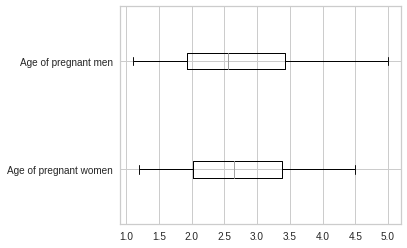

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
x = [[1.2, 2.3, 3.0, 4.5],
     [1.1, 2.2, 2.9, 5.0]]
df = pd.DataFrame(x, index=['Age of pregnant women', 'Age of pregnant men'])

df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [ ]:
#Reading in the entire craton dataset
df_dep = pd.read_csv('Gawler_Data.csv')

#Splitting data into features, areas of interests and zones
X_all = df_dep.drop(['Unnamed: 0', 'Areas_of_Interest', 'Zones', 'SA_RESIDUAL'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.1,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0, verbose=2)
regression.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.0s remaining:    0.0s


building tree 2 of 100


KeyboardInterrupt: ignored

In [ ]:
regression

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

df = df[df["SA_TMI_RTP"] != -99999.0]
X = df.iloc[:,list(range(0,df.shape[1]-1))].values
Y = df.iloc[:,[df.shape[1]-1]].values

X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]
# define model

model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)



KeyError: ignored

In [ ]:
#Formatting plot
plt.rcParams.update({'font.size': 14})

#prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('XGBOOST', XGBClassifier()))

# valuate each model in turn
print("MODEL: F1 Score (STD)")

results_ba = []
results_recall = []
results_f1 = []
names = []

for name, model in models:
    cv_results_ba = model_selection.cross_val_score(model, X, Y, cv=gss, scoring='balanced_accuracy', groups=Z)
    cv_results_f1 = model_selection.cross_val_score(model, X, Y, cv=gss, scoring='f1', groups=Z)
    cv_results_recall = model_selection.cross_val_score(model, X, Y, cv=gss, scoring='recall', groups=Z)
    results_ba.append(cv_results_ba)
    results_recall.append(cv_results_recall)
    results_f1.append(cv_results_f1)
    names.append(name)
    msg = "%s: BA %f (%f), F1 %f (%f), Recall %f (%f)" % (name, cv_results_ba.mean(), cv_results_ba.std(),  cv_results_f1.mean(), cv_results_f1.std(),  cv_results_recall.mean(), cv_results_recall.std())
    print(msg)

In [ ]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('SVM',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('NB', Gaussi

In [ ]:
print("MODEL: F1 SCORE (STD)")

results = []
names = []

results_ba = []
results_recall = []
results_f1 = []

scalar = MinMaxScaler()

for name, model in models:
    pipeline = Pipeline([('transformer', scalar), ('estimator', model)]) 

    cv_results = model_selection.cross_val_score(pipeline, X, Y, cv=gss, scoring='f1', groups=Z)
    
    results.append(cv_results)

    names.append(name+'\nScaled')
    print(msg)
    
# # boxplot algorithm comparison
# fig = plt.figure(figsize=(15,10))
# fig.suptitle('Algorithm Comparison', x=0.5, y=0.92, fontsize=15, fontweight='bold')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_ylabel('Weighted F1 Score', fontsize=15)
# ax.set_xticklabels(names)
# plt.show()

MODEL: F1 SCORE (STD)


NameError: ignored

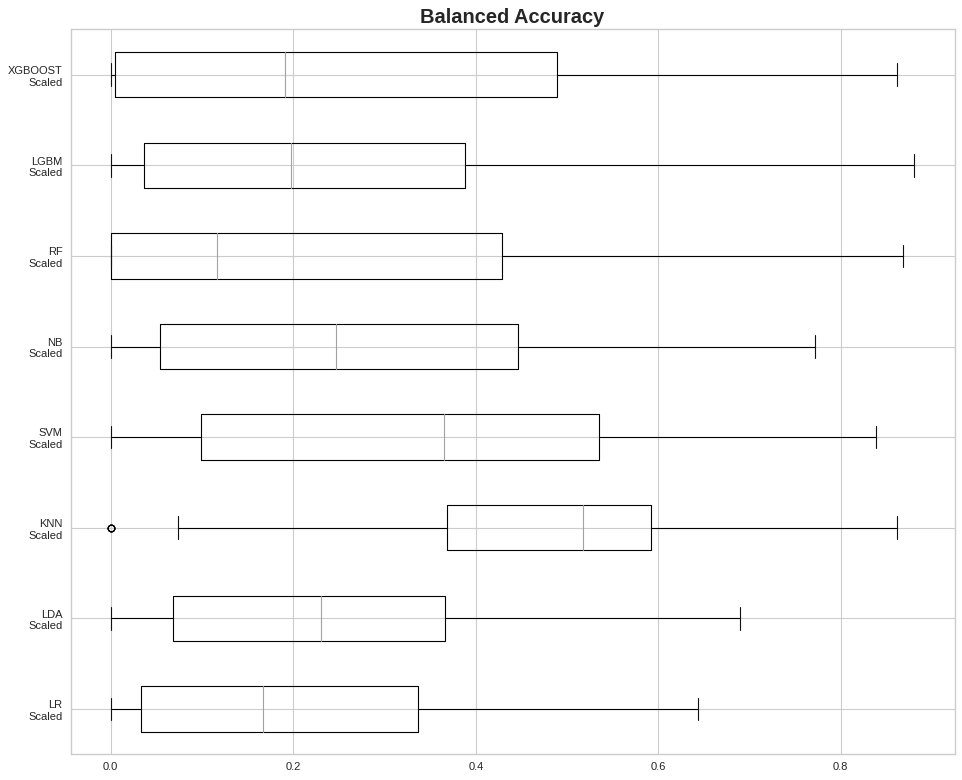

In [ ]:
# acc = [[results_ba], [results_recall], [results_f1]]
from matplotlib.pyplot import figure

figure(figsize=(17, 12), dpi=80)
df = pd.DataFrame(results, index=names)
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('Balanced Accuracy', fontsize=18, fontweight='bold')
plt.show()

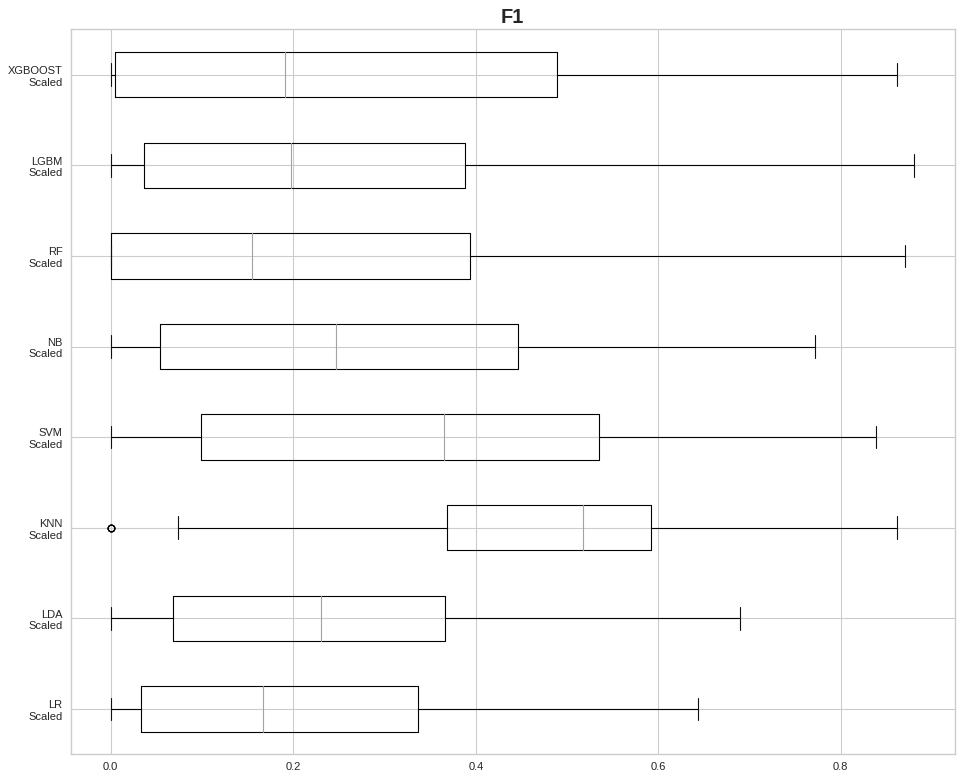

In [ ]:
# acc = [[results_ba], [results_recall], [results_f1]]
from matplotlib.pyplot import figure

figure(figsize=(17, 12), dpi=80)
df = pd.DataFrame(results_f1, index=names)
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('F1', fontsize=18, fontweight='bold')
plt.show()

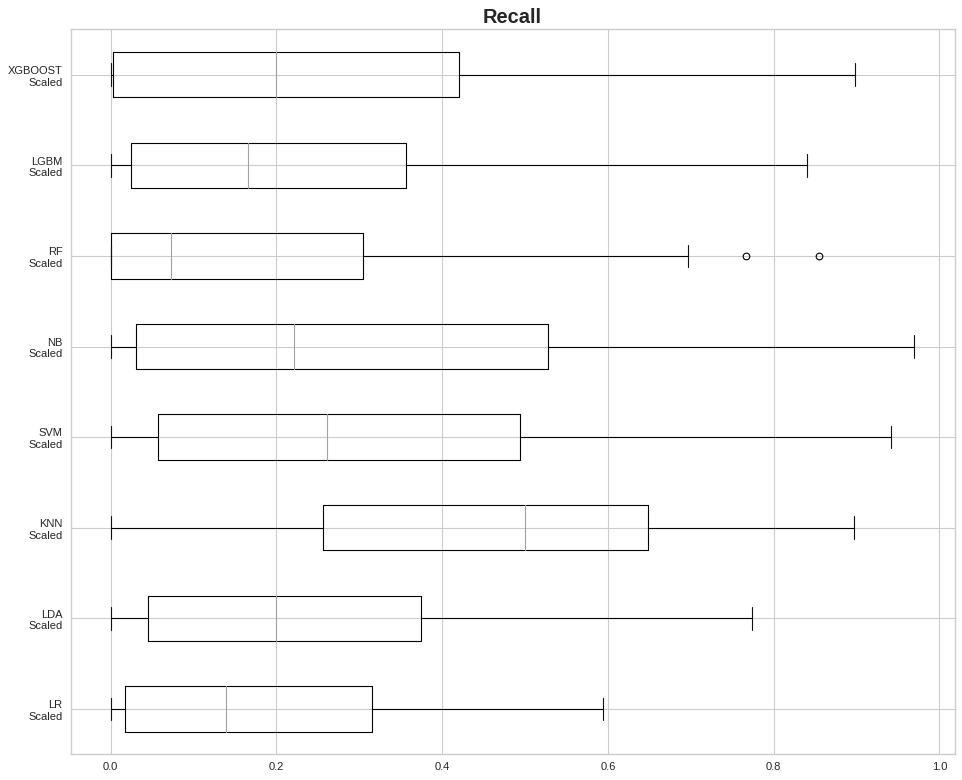

In [ ]:
# acc = [[results_ba], [results_recall], [results_f1]]
from matplotlib.pyplot import figure

figure(figsize=(17, 12), dpi=80)
df = pd.DataFrame(results_recall, index=names)
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('Recall', fontsize=18, fontweight='bold')
plt.show()

In [ ]:
model = LogisticRegression()


In [ ]:
#Creating a pipeline of scaler and KNN
pipeline = Pipeline([('transformer', scalar), ('clf', KNeighborsClassifier())])

In [ ]:
#Selecting the parameters
params = dict(clf__n_neighbors=[8, 10, 12, 14, 18, 22, 26, 30, 40, 45, 50],
              clf__weights=['uniform', 'distance'],
             clf__metric=['euclidean', 'manhattan'])

#Creating a metrics list
metrics = ['accuracy', 'precision', 'recall', 'f1']

scores = []
parameters = []
#Looping through each metric
for metric in metrics:
    searchCV = GridSearchCV(pipeline, params, scoring=metric, n_jobs=1, cv=gss)

    searchCV.fit(X, Y, Z)  
    scores.append(searchCV.best_score_)
    parameters.append(searchCV.best_params_)
    print(searchCV.best_params_)
    print('Best Score ('+metric+'): '+str(searchCV.best_score_))
    print('__________________________________________')

{'clf__metric': 'manhattan', 'clf__n_neighbors': 14, 'clf__weights': 'distance'}
Best Score (accuracy): 0.6383693803813251
__________________________________________
{'clf__metric': 'manhattan', 'clf__n_neighbors': 14, 'clf__weights': 'uniform'}
Best Score (precision): 0.5211762213782503
__________________________________________
{'clf__metric': 'manhattan', 'clf__n_neighbors': 14, 'clf__weights': 'distance'}
Best Score (recall): 0.4592390316631915
__________________________________________
{'clf__metric': 'manhattan', 'clf__n_neighbors': 14, 'clf__weights': 'distance'}
Best Score (f1): 0.4559138050497112
__________________________________________


In [ ]:
colNames = ['Metric' , 'Performance'] + list(parameters[0].keys())
dataList = []
metricAs = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, x in enumerate(parameters):
  data = [metricAs[i]]+ [scores[i]] + list(x.values())
  dataList.append(data)
df = pd.DataFrame(dataList, columns = colNames)
df.reset_index(drop=True)
df

['Metric', 'Performance', 'clf__metric', 'clf__n_neighbors', 'clf__weights']

In [ ]:
dataList = []
metricAs = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, x in enumerate(parameters):
  data = [metricAs[i]]+ [scores[i]] + list(x.values())
  dataList.append(data)
dataList

[['Accuracy', 0.6383693803813251, 'manhattan', 14, 'distance'],
 ['Precision', 0.5211762213782503, 'manhattan', 14, 'uniform'],
 ['Recall', 0.4592390316631915, 'manhattan', 14, 'distance'],
 ['F1', 0.4559138050497112, 'manhattan', 14, 'distance']]

In [ ]:
df = pd.DataFrame(dataList, columns = colNames)
df.reset_index(drop=True)
df

,Metric,Performance,clf__metric,clf__n_neighbors,clf__weights
0,Accuracy,0.638369,manhattan,14,distance
1,Precision,0.521176,manhattan,14,uniform
2,Recall,0.459239,manhattan,14,distance
3,F1,0.455914,manhattan,14,distance


In [ ]:
#Defining a function that will analyse the ROC curves for each split
from matplotlib.pyplot import figure


def plot_roc(X, Y, gss, model, name):
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    fig, ax = plt.subplots(figsize=(15,10))
    
    for i, (train, test) in enumerate(gss.split(X, Y, Z)):
        if len(test) >= 150 and len(train) >= 500:
    
            model.fit(X.iloc[train], Y.iloc[train])
            viz = plot_roc_curve(model, X.iloc[test], Y.iloc[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
            interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[0, 1], ylim=[0,1],
       title="ROC: "+name)
    ax.get_legend().remove()
    plt.savefig("")
    plt.show()

<Figure size 576x864 with 0 Axes>

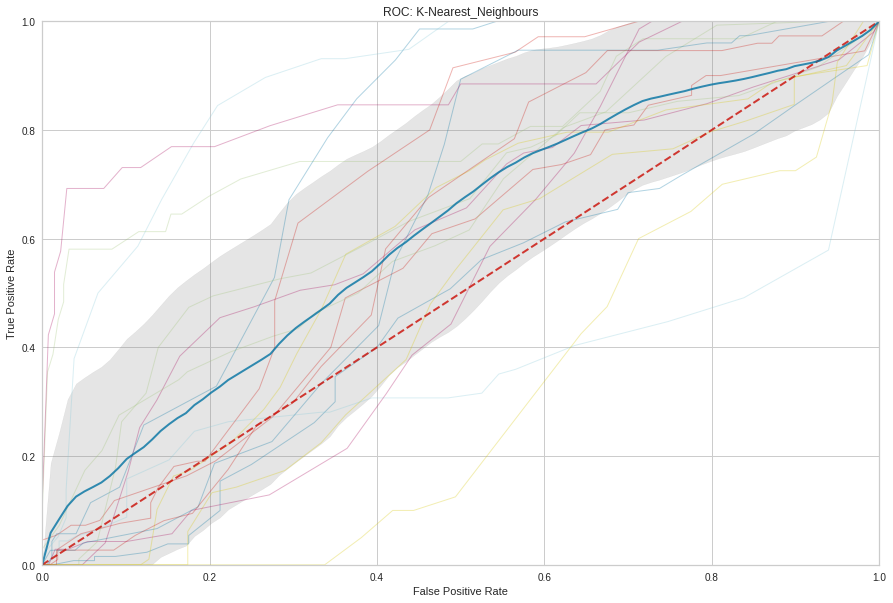

In [ ]:
#Adjusting model parameters
model = KNeighborsClassifier(metric='euclidean', n_neighbors=35, weights='uniform', algorithm='auto')
pipeline = Pipeline([('transformer', scalar), ('clf', model)])
figure(figsize=(8, 12))

#Plotting ROC curve
plot_roc(X, Y, gss, model=pipeline, name='K-Nearest_Neighbours')